In [664]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Carga dos dados

In [665]:
# Abrir o dataset
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [666]:
# Checar estrutura do dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [667]:
#Visualizar Topo do dataset
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [668]:
# Visualizar Final do dataset
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [669]:
# Medidas estatisitcas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

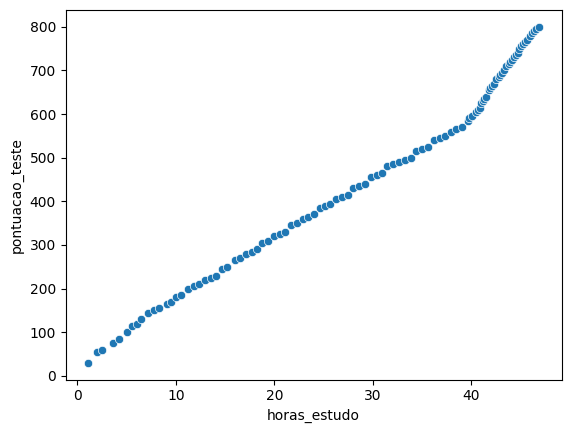

In [670]:
# Plot de Dispersão
# X = horas de estudo
# y = pontuação
sns.scatterplot(x='horas_estudo', y='pontuacao_teste', data=df_pontuacao)

<Axes: ylabel='horas_estudo'>

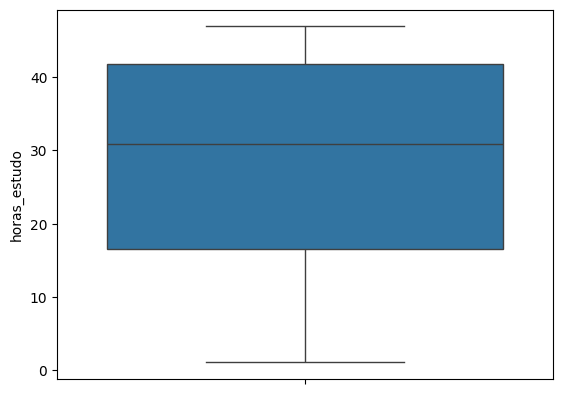

In [671]:
# Verificar se temos outliers
# Plot Boxplot
sns.boxplot(df_pontuacao['horas_estudo'])

<Axes: ylabel='pontuacao_teste'>

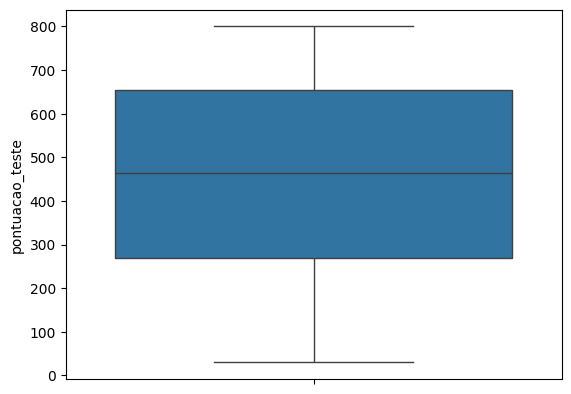

In [672]:
# Verificar se temos outliers na variavel dependente
# Plot Boxplot
sns.boxplot(df_pontuacao['pontuacao_teste'])

<Axes: >

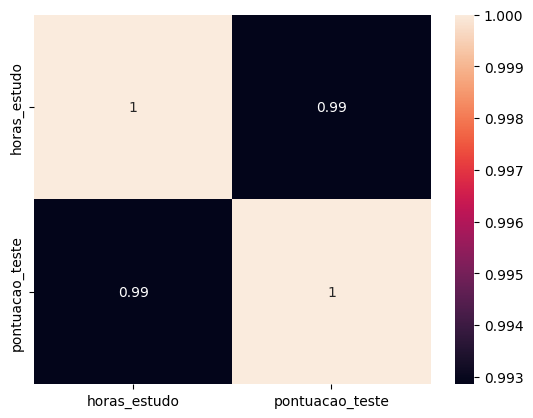

In [673]:
# Verificar Correlação - Coeficiente de Pearson
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

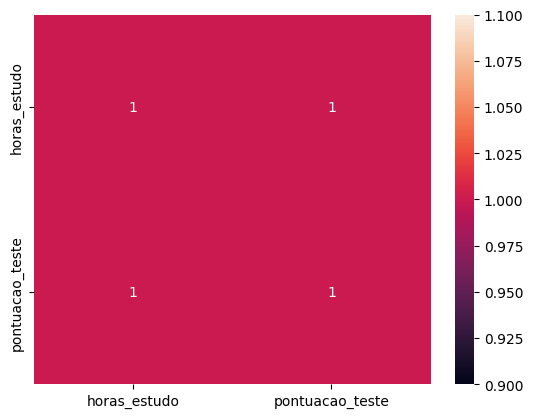

In [674]:
# Verificar Correlação - Coeficiente de Spearman
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

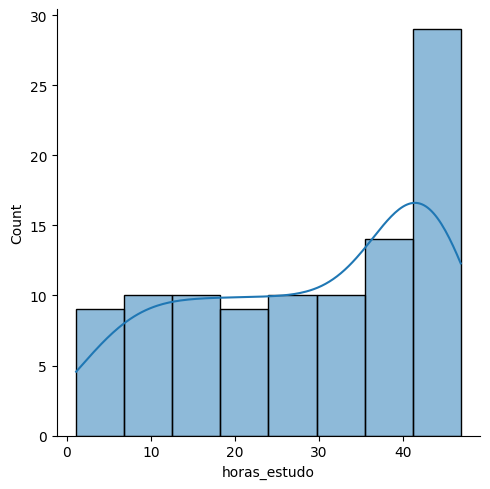

In [675]:
# Histograma da variável independente
sns.displot(df_pontuacao['horas_estudo'], kde=True)

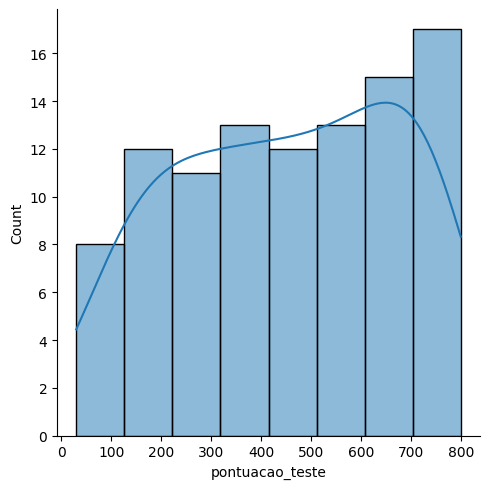

In [676]:
# Histograma da variável dependente
sns.displot(df_pontuacao['pontuacao_teste'], kde=True)

### Conclusão EDA
#### Não temos outliers, as variaveis tem forte correlação, tem possibilidade de usar um modelo linear. Existe uma assimetria negativa pro lado esquerdo nos histogramas.

### Treinamento do Modelo

In [677]:
# Primeiro vamos dividir o dataset em treino e teste
# Quando temos apenas uma feature (variavel independente) precisamos ajustar o shape do array
X = df_pontuacao['horas_estudo'].values.reshape(-1, 1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1, 1)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [678]:
# Instanciar o modelo a ser treinado
reg_model = LogisticRegression(max_iter=3000)

In [679]:
# Treinar o modelo
reg_model.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=3000)

In [680]:
# Imprimir a equação da reta
# y = ax + b
a = reg_model.coef_
b = reg_model.intercept_
print("A equação da reta é: y = {:4f}x + {:4f}".format(a[0][0], b[0]))

A equação da reta é: y = -1.558957x + 26.464025


### Validação do Modelo - Métricas

In [681]:
# Predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [682]:
# Calcular métrica R-Squared (R2) ou Coeficiente de Determinação
# R2 é uma métrica que mede a proporção da variabilidade na variável dependente que é previsível a partir da variável independente
# Quanto mais próximo de 1, melhor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred)

0.9939863339826237

In [683]:
# Calcular métrica MAE - Mean Absolute Error
# MAE é a média do valor absoluto dos erros entre previsões e valores reais
# MAE é menos sensível a outliers
# Quanto menor, melhor
mean_absolute_error(y_test, y_pred)

15.64516129032258

In [684]:
# Calcular métrica MSE - Mean Squared Error
# MSE é a média dos quadrados dos erros entre previsões e valores reais
# MSE é mais sensível a outliers e penaliza erros maiores
# Não é uma métrica fácil de interpretar
# Quanto menor, melhor
# Interessante para comparar modelos
mean_squared_error(y_test, y_pred)

313.7096774193548

In [685]:
# Calcular métrica RMSE - Root Mean Squared Error
# RMSE é a raiz quadrada da média dos quadrados dos erros entre previsões e valores reais
# RMSE é mais sensível a outliers e penaliza erros maiores
# RMSE é mais fácil de interpretar que MSE pois utiliza a mesma unidade da variável dependente
# Quanto menor, melhor
mean_squared_error(y_test, y_pred, squared=False)

/home/tauan/.local/share/virtualenvs/regressao_linear_simples-msTiqtOJ/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


17.7118513267065

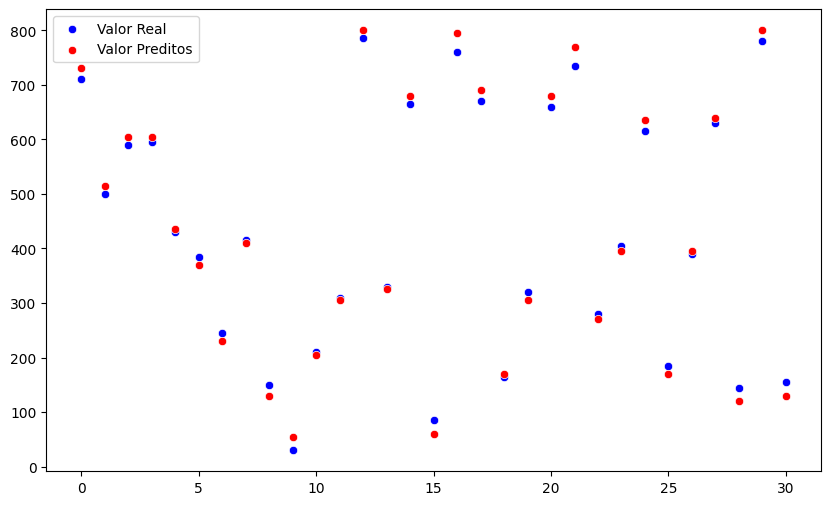

In [686]:
# Analise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), label='Valor Real', color='blue')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), label='Valor Preditos', color='red')
plt.legend()
plt.show()

### Análise de Resíduos

In [687]:
# Calcular residuos
# Residuos são a diferença entre os valores reais de teste e os valores preditos
residuos = y_test - y_pred

In [688]:
# Calcular os resíduos padronizados (Standardization ou Z-Score)
# Residuos padronizados são os residuos divididos pelo desvio padrão
# Para cada elemento de um conjunto (x - media) / desvio_padrao
# Quanto mais próximo de 0, melhor
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

In [689]:
# Verificar a linearidade do modelo
# Se os resíduos estiverem entre -2 e 2, o modelo é linear

# Verificar homogeneidade das variâncias (homocedasticidade)
# Valores estiverem em torno da reta y=0, o modelo é homocedástico
# Caso contrário, o modelo é heterocedástico
print(len(residuos_padronizados))
print(len(y_pred.reshape(-1)))
#sns.scatterplot(x=y_pred.reshape(-1), y=residuos_padronizados.reshape(-1))

31
31


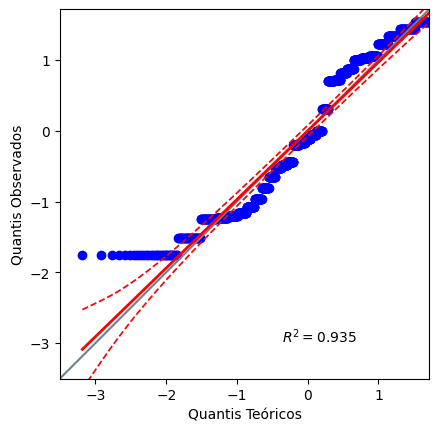

In [690]:
# Checar se resiudos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, ou Gráfico de Probabilidade Normal
# Se os pontos estiverem próximos da linha, os resíduos seguem uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_padronizados, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis Observados')
plt.show()

In [691]:
# Teste de Normalidade - Shapiro-Wilk
# H0: A amostra segue uma distribuição normal
# H1: A amostra não segue uma distribuição normal
# Se p-valor > 0.05, não rejeitamos H0
# Se p-valor < 0.05, rejeitamos H0
stat_shapiro, pvalue = shapiro(residuos.reshape(-1))
print("Estatística de Teste: ", stat_shapiro)
print("P-Valor: ", pvalue)

Estatística de Teste:  0.9885756291636091
P-Valor:  8.218425775325265e-07


In [692]:
# Teste de Normalidade - Kolmogorov-Smirnov
# H0: A amostra segue uma distribuição normal
# H1: A amostra não segue uma distribuição normal
# Se p-valor > 0.05, não rejeitamos H0
# Se p-valor < 0.05, rejeitamos H0
stat_ks, pvalue_ks = kstest(residuos.reshape(-1),'norm')
print("Estatística de Teste: ", stat_ks)
print("P-Valor: ", pvalue_ks)

Estatística de Teste:  0.5067635010695519
P-Valor:  3.525567521077445e-229


### Predições com o modelo

In [693]:
# Se eu estudar 30.4 horas, qual a minha pontuação?
horas_estudo = 30.4
pontuacao = reg_model.predict([[horas_estudo]])
print("Se eu estudar {:.2f} horas, minha pontuação será de {:.2f}".format(horas_estudo, pontuacao[0]))

Se eu estudar 30.40 horas, minha pontuação será de 460.00


In [696]:
# Quantas horas de estudo preciso para atingir 600 pontos?
# x = (600 - b) / a
(500 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

-303.75171991816444

### Salvar modelo para usar depois

In [697]:
import joblib
# Salvar o modelo
joblib.dump(reg_model, './modelo_pontuacao.pkl')

['./modelo_pontuacao.pkl']